In [ ]:
import pandas as pd #Dataframes
from scipy.stats import zscore

In [ ]:
#Grabbing Data
data = pd.read_csv('GlobalWeatherRepository.csv')
data.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [ ]:
#Datset Structure
print(f'Dataset info: {data.info()}')
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49501 entries, 0 to 49500
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       49501 non-null  object 
 1   location_name                 49501 non-null  object 
 2   latitude                      49501 non-null  float64
 3   longitude                     49501 non-null  float64
 4   timezone                      49501 non-null  object 
 5   last_updated_epoch            49501 non-null  int64  
 6   last_updated                  49501 non-null  object 
 7   temperature_celsius           49501 non-null  float64
 8   temperature_fahrenheit        49501 non-null  float64
 9   condition_text                49501 non-null  object 
 10  wind_mph                      49501 non-null  float64
 11  wind_kph                      49501 non-null  float64
 12  wind_degree                   49501 non-null  int64  
 13  w

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
moon_phase                      0
moon_illumination               0
dtype: int64

In [ ]:
df = data.copy()
unique_countries = df['country'].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazak

In [ ]:
Wrong_Countries = ['USA United States of America', 'كولومبيا', 'Malásia', 'Гватемала', 'Турция',
                  'Польша', 'Mexique', 'Polônia', 'Marrocos', 'Турция','Saudi Arabien', 'Südkorea', 'Bélgica', 'Turkménistan',
                   '火鸡', 'Jemen', 'Südkorea','Inde', 'Estonie', 'Letonia', 'Saint-Vincent-et-les-Grenadines']
df[df['country'].isin(Wrong_Countries)]


country          location_name  latitude  \
7998      USA United States of America                 Moroni     39.53   
8023      USA United States of America                Grenada     33.78   
8083      USA United States of America                  Palau      7.50   
11474                          Malásia        Ivory Ivory Ban      4.63   
11484                         كولومبيا             Costa Rica      6.43   
11492                          Estonie                Tallinn     59.43   
11504                        Гватемала          New Guatemala     14.62   
11512                             Inde              New Delhi     28.60   
11525                          Letonia                   Riga     56.95   
11526                           Польша                 Beirut     51.12   
11538                          Mexique  Mexico (Grupo Mexico)     27.42   
11540                          Polônia                Moldova     53.33   
11543                         Marrocos           Morocco City     31.63   
11547                           Турция                  Yaren     39.55   
11565  Saint-Vincent-et-les-Grenadines              Kingstown     13.13   
11568                    Saudi Arabien              Ar Riyadh     24.64   
11577                         Südkorea                  Seoul     37.57   
11581                          Bélgica                   Bern     51.10   
11588                     Turkménistan   Krasnyy Turkmenistan     37.70   
11592                               火鸡               -Kingdom     38.85   
11597                            Jemen                  Sanaa     15.35   

       longitude            timezone  last_updated_epoch      last_updated  \
7998     -111.59      America/Denver          1719321300  2024-06-25 07:15   
8023      -89.81     America/Chicago          1719321300  2024-06-25 08:15   
8083      134.57       Pacific/Palau          1719321300  2024-06-25 22:15   
11474     118.37        Asia/Kuching          1720875600  2024-07-13 21:00   
11484     -70.92      America/Bogota          1720875600  2024-07-13 08:00   
11492      24.73      Europe/Tallinn          1720875600  2024-07-13 16:00   
11504     -90.53   America/Guatemala          1720875600  2024-07-13 07:00   
11512      77.20        Asia/Kolkata          1720875600  2024-07-13 18:30   
11525      24.10         Europe/Riga          1720875600  2024-07-13 16:00   
11526      17.53       Europe/Warsaw          1720875600  2024-07-13 15:00   
11538    -109.93  America/Hermosillo          1720875600  2024-07-13 06:00   
11540      21.62       Europe/Warsaw          1720875600  2024-07-13 15:00   
11543      -8.00   Africa/Casablanca          1720875600  2024-07-13 14:00   
11547      27.62     Europe/Istanbul          1720875600  2024-07-13 16:00   
11565     -61.22  America/St_Vincent          1720875600  2024-07-13 09:00   
11568      46.77         Asia/Riyadh          1720875600  2024-07-13 16:00   
11577     127.00          Asia/Seoul          1720875600  2024-07-13 22:00   
11581       4.75     Europe/Brussels          1720875600  2024-07-13 15:00   
11588      65.37       Asia/Ashgabat          1720875600  2024-07-13 18:00   
11592      34.65     Europe/Istanbul          1720875600  2024-07-13 16:00   
11597      44.21           Asia/Aden          1720875600  2024-07-13 16:00   

       temperature_celsius  temperature_fahrenheit        condition_text  ...  \
7998                  18.2                    64.7                 Sunny  ...   
8023                  28.2                    82.8                 Sunny  ...   
8083                  27.2                    81.0     Light rain shower  ...   
11474                 24.3                    75.7     Light rain shower  ...   
11484                 23.1                    73.5                  Mist  ...   
11492                 23.3                    73.9         Partly cloudy  ...   
11504                 15.9                    60.6                  Mist  ...   
11512          

In [ ]:
data_new = df.copy()
data_new.iloc[7998,0] = 'United States of America'
data_new.iloc[8023,0] = 'United States of America'
data_new.iloc[8083,0] = 'United States of America'
data_new.iloc[11474,0] = 'Malaysia'
data_new.iloc[11484,0] = 'Colombia'
data_new.iloc[11492,0] = 'Estonia'
data_new.iloc[11504,0] = 'Republic of Guatemala'
data_new.iloc[11512,0] = 'India'
data_new.iloc[11525,0] = 'Latvia'
data_new.iloc[11526,0] = 'Lebanon'
data_new.iloc[11538,0] = 'Mexico'
data_new.iloc[11540,0] = 'Poland'
data_new.iloc[11543,0] = 'Morocco'
data_new.iloc[11547,0] = 'Turkey'
data_new.iloc[11565,0] = 'Saint Vincent and the Grenadines'
data_new.iloc[11568,0] = 'Saudi Arabia'
data_new.iloc[11577,0] = 'South Korea'
data_new.iloc[11581,0] = 'Belgium'
data_new.iloc[11588,0] = 'Turkmenistan'
data_new.iloc[11592,0] = 'Turkey'
data_new.iloc[11597,0] = 'Yemen'

In [ ]:
Wrong_Countries = ['USA United States of America', 'كولومبيا', 'Malásia', 'Гватемала', 'Турция',
                  'Польша', 'Mexique', 'Polônia', 'Marrocos', 'Турция','Saudi Arabien', 'Südkorea', 'Bélgica', 'Turkménistan',
                   '火鸡', 'Jemen', 'Südkorea','Inde', 'Estonie', 'Letonia', 'Saint-Vincent-et-les-Grenadines']
data_new[data_new['country'].isin(Wrong_Countries)]

Empty DataFrame
Columns: [country, location_name, latitude, longitude, timezone, last_updated_epoch, last_updated, temperature_celsius, temperature_fahrenheit, condition_text, wind_mph, wind_kph, wind_degree, wind_direction, pressure_mb, pressure_in, precip_mm, precip_in, humidity, cloud, feels_like_celsius, feels_like_fahrenheit, visibility_km, visibility_miles, uv_index, gust_mph, gust_kph, air_quality_Carbon_Monoxide, air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide, air_quality_PM2.5, air_quality_PM10, air_quality_us-epa-index, air_quality_gb-defra-index, sunrise, sunset, moonrise, moonset, moon_phase, moon_illumination]
Index: []

[0 rows x 41 columns]

In [ ]:
data_new['location_name'].unique()


array(['Kabul', 'Tirana', 'Algiers', 'Andorra La Vella', 'Luanda',
       "Saint John's", 'Buenos Aires', 'Yerevan', 'Canberra', 'Vienna',
       'Baku', 'Nassau', 'Manama', 'Dhaka', 'Bridgetown', 'Minsk',
       'Brussels', 'Belmopan', 'Porto-Novo', 'Thimphu', 'Sucre',
       'Sarajevo', 'Gaborone', 'Bras', 'Bandar Seri Begawan', 'Sofia',
       'Ouagadougou', 'Bujumbura', 'Ivory', 'Praia', 'Phnom Penh',
       'Yaounde', 'Ottawa', 'Bangui', "N'djamena", 'Santiago', 'Beijing',
       'Bogot', 'Moroni', 'Brazzaville', 'San Juan', 'Zagreb', 'Havana',
       'Nicosia', 'Prague', 'Kinshasa', 'Copenhagen', 'Djibouti',
       'Roseau', 'Santo Domingo', 'Quito', 'Cairo', 'San Salvador',
       'Malabo', 'Asmara', 'Tallinn', 'Mbabane', 'Addis Ababa', 'Suva',
       'Helsinki', 'Paris', 'Libreville', 'Banjul', 'Tbilisi', 'Berlin',
       'Accra', 'Athens', "Saint George's", 'Guatemala City', 'Conakry',
       'Bissau', 'Georgetown', 'Port-Au-Prince', 'Vatican City',
       'Tegucigalpa', 'Buda

In [ ]:
wrong_locations = ["'S Gravenjansdyk", 'Ivory Ivory Ban', 'Beijing Shi', 'Mexico (Grupo Mexico)', '-Kingdom']
data_new[data_new['location_name'].isin(wrong_locations)]

country          location_name  latitude  longitude  \
3655    Belgium       'S Gravenjansdyk     51.25       3.63   
3850    Belgium       'S Gravenjansdyk     51.25       3.63   
4433    Belgium       'S Gravenjansdyk     51.25       3.63   
4628    Belgium       'S Gravenjansdyk     51.25       3.63   
4823    Belgium       'S Gravenjansdyk     51.25       3.63   
5018    Belgium       'S Gravenjansdyk     51.25       3.63   
5213    Belgium       'S Gravenjansdyk     51.25       3.63   
5603    Belgium       'S Gravenjansdyk     51.25       3.63   
5798    Belgium       'S Gravenjansdyk     51.25       3.63   
6575    Belgium       'S Gravenjansdyk     51.25       3.63   
6765    Belgium       'S Gravenjansdyk     51.25       3.63   
6953    Belgium       'S Gravenjansdyk     51.25       3.63   
11474  Malaysia        Ivory Ivory Ban      4.63     118.37   
11481     China            Beijing Shi     39.93     116.39   
11538    Mexico  Mexico (Grupo Mexico)     27.42    -109.93   
11592    Turkey               -Kingdom     38.85      34.65   

                 timezone  last_updated_epoch      last_updated  \
3655      Europe/Brussels          1717336800  2024-06-02 16:00   
3850      Europe/Brussels          1717424100  2024-06-03 16:15   
4433      Europe/Brussels          1717682400  2024-06-06 16:00   
4628      Europe/Brussels          1717768800  2024-06-07 16:00   
4823      Europe/Brussels          1717856100  2024-06-08 16:15   
5018      Europe/Brussels          1717942500  2024-06-09 16:15   
5213      Europe/Brussels          1718028900  2024-06-10 16:15   
5603      Europe/Brussels          1718201700  2024-06-12 16:15   
5798      Europe/Brussels          1718287200  2024-06-13 16:00   
6575      Europe/Brussels          1718632800  2024-06-17 16:00   
6765      Europe/Brussels          1718719200  2024-06-18 16:00   
6953      Europe/Brussels          1718804700  2024-06-19 15:45   
11474        Asia/Kuching          1720875600  2024-07-13 21:00   
11481       Asia/Shanghai          1720875600  2024-07-13 21:00   
11538  America/Hermosillo          1720875600  2024-07-13 06:00   
11592     Europe/Istanbul          1720875600  2024-07-13 16:00   

       temperature_celsius  temperature_fahrenheit      condition_text  ...  \
3655                  14.0                    57.2       Partly cloudy  ...   
3850                  17.0                    62.6       Partly cloudy  ...   
4433                  15.0                    59.0       Partly cloudy  ...   
4628                  18.2                    64.8            Overcast  ...   
4823                  18.2                    64.8       Partly cloudy  ...   
5018                  16.3                    61.3            Overcast  ...   
5213                  12.1                    53.8          Light rain  ...   
5603                  14.1                    57.4            Overcast  ...   
5798                  18.4                    65.1       Partly cloudy  ...   
6575                  18.6                    65.6  Patchy rain nearby  ...   
6765                  17.1                    62.8   Light rain shower  ...   
6953                  17.1                    62.8       Partly cloudy  ...   
11474                 24.3                    75.7   Light rain shower  ...   
11481                 24.3                    75.8       Partly Cloudy  ...   
11538                 27.4                    81.4       Partly Cloudy  ...   
11592                 29.7                    85.4               Sunny  ...   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
3655                 3.1              11.3                         1   
3850                 2.2               4.3                         1   
4433                 2.1               3.3                         1   
4628                 1.7               2.6                         1   
4823                 1.2               2.2                         1   
5018                

In [ ]:
data_new.iloc[3655,1] = "'S Gravenjansdijk"
data_new.iloc[3850,1] = "'S Gravenjansdijk"
data_new.iloc[4433,1] = "'S Gravenjansdijk"
data_new.iloc[4628,1] = "'S Gravenjansdijk"
data_new.iloc[4823,1] = "'S Gravenjansdijk"
data_new.iloc[5018,1] = "'S Gravenjansdijk"
data_new.iloc[5213,1] = "'S Gravenjansdijk"
data_new.iloc[5603,1] = "'S Gravenjansdijk"
data_new.iloc[5798,1] = "'S Gravenjansdijk"
data_new.iloc[6575,1] = "'S Gravenjansdijk"
data_new.iloc[6765,1] = "'S Gravenjansdijk"
data_new.iloc[6953,1] = "'S Gravenjansdijk"
data_new.iloc[11481,1] = 'Beijing'
data_new.iloc[11538,1] = 'Mexico City'
data_new.iloc[11592,1] = 'Istanbul'
#data_new = data_new.drop(11474)  # Dropping row with location_name = 'Ivory Ivory Ban'

In [ ]:
data_new['condition_text'].unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet', 'Blizzard',
       'Moderate snow', 'Light snow', 'Light sleet showers',
       'Light freezing rain', 'Heavy snow', 'Blowing snow',
       'Patchy heavy snow', 'Light snow showers',
       'Moderate or heavy sleet', 'Patchy light snow',
       'Patchy mo

In [ ]:
data_new['condition_text'].replace(['Partly cloudy','Patchy light rain in area with thunder', 'Light rain', 'Moderate or heavy rain in area with thunder', 'Thundery outbreaks in nearby', 'Thundery outbreaks possible'],
                                 ['Partly Cloudy', 'Patchy light rain with thunder', 'Light rain shower', 'Moderate or heavy rain with thunder', 'Thunder outbreaks in nearby', 'Thunder outbreaks possible'], inplace=True)

<ipython-input-12-203bd41cbf6b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new['condition_text'].replace(['Partly cloudy','Patchy light rain in area with thunder', 'Light rain', 'Moderate or heavy rain in area with thunder', 'Thundery outbreaks in nearby', 'Thundery outbreaks possible'],


In [ ]:
import pandas as pd #Dataframes
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Load your dataset (Replace with your file path)
df = pd.read_csv("GlobalWeatherRepository.csv")

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49501 entries, 0 to 49500
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       49501 non-null  object 
 1   location_name                 49501 non-null  object 
 2   latitude                      49501 non-null  float64
 3   longitude                     49501 non-null  float64
 4   timezone                      49501 non-null  object 
 5   last_updated_epoch            49501 non-null  int64  
 6   last_updated                  49501 non-null  object 
 7   temperature_celsius           49501 non-null  float64
 8   temperature_fahrenheit        49501 non-null  float64
 9   condition_text                49501 non-null  object 
 10  wind_mph                      49501 non-null  float64
 11  wind_kph                      49501 non-null  float64
 12  wind_degree                   49501 non-null  int64  
 13  w

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [ ]:
# Choose a numerical column (e.g., temperature in Celsius)
col = "temperature_celsius"

In [ ]:
# Compute Z-scores for the selected column
df["Z_score"] = zscore(df[col], nan_policy='omit')


In [ ]:
# Define outlier threshold (typically |Z| > 3)
outliers = df[(df["Z_score"] > 3) | (df["Z_score"] < -3)]

# Display detected outliers
print(f"Total outliers found: {outliers.shape[0]}")
print(outliers[[col, "Z_score"]].head())  # Show sample outliers


Total outliers found: 258
       temperature_celsius   Z_score
29040                 -5.9 -3.134959
29235                 -8.4 -3.406488
29820                 -7.9 -3.352182
30015                 -6.1 -3.156681
30405                 -6.7 -3.221848


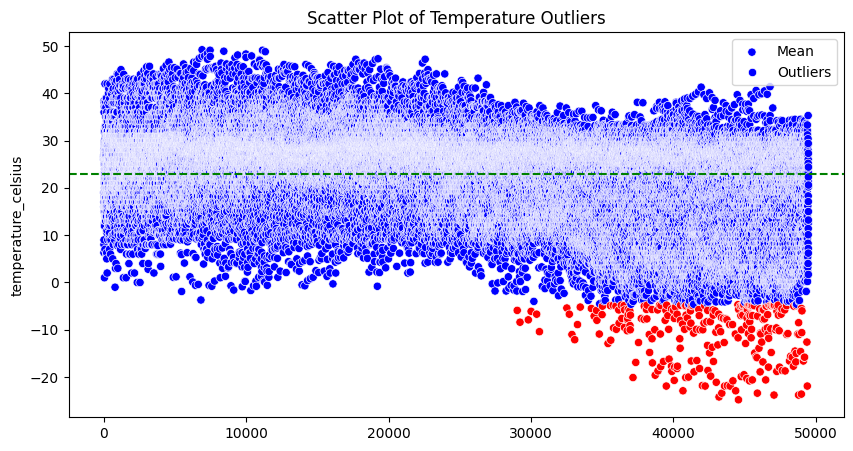

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=range(len(df)), y="temperature_celsius", hue=df["Z_score"].abs() > 3, palette={True: "red", False: "blue"})
plt.axhline(df["temperature_celsius"].mean(), color="green", linestyle="dashed", label="Mean")
plt.title("Scatter Plot of Temperature Outliers")
plt.legend(["Mean", "Outliers"])
plt.show()

In [ ]:
features = ['temperature_fahrenheit','wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']

Total outliers found: 13144
    temperature_fahrenheit   Z_score
3                     43.3 -1.812412
6                     46.4 -1.625357
8                     48.2 -1.516745
12                    96.8  1.415783
13                   101.2  1.681279


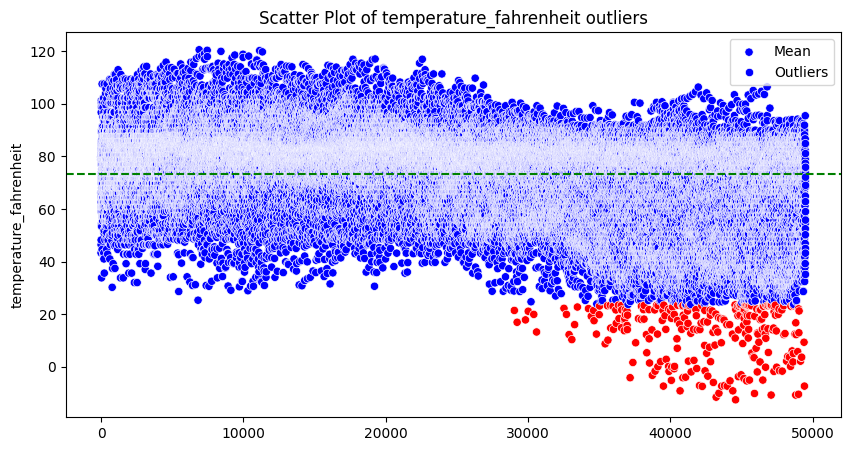

Total outliers found: 2542
    wind_mph   Z_score
44      19.2  1.110411
46      19.2  1.110411
64      20.6  1.252830
75      18.6  1.049374
85      20.6  1.252830


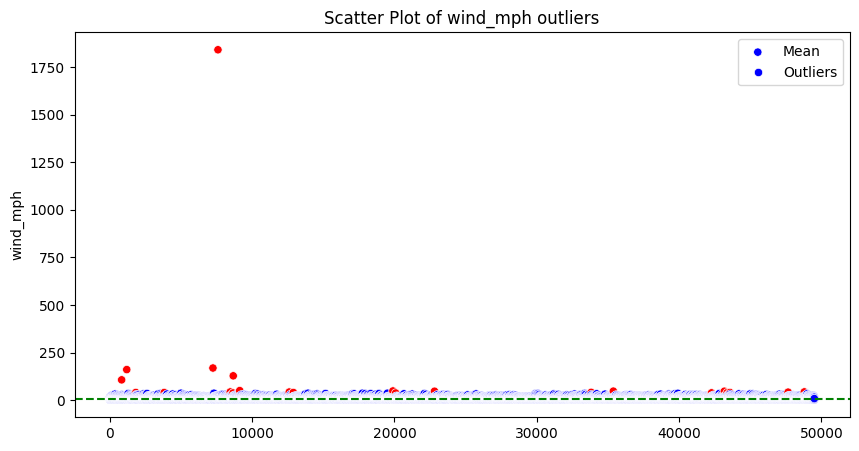

Total outliers found: 12411
    pressure_in   Z_score
8         30.33  1.889796
13        29.71 -1.082476
15        30.33  1.889796
16        29.62 -1.513934
22        30.36  2.033615


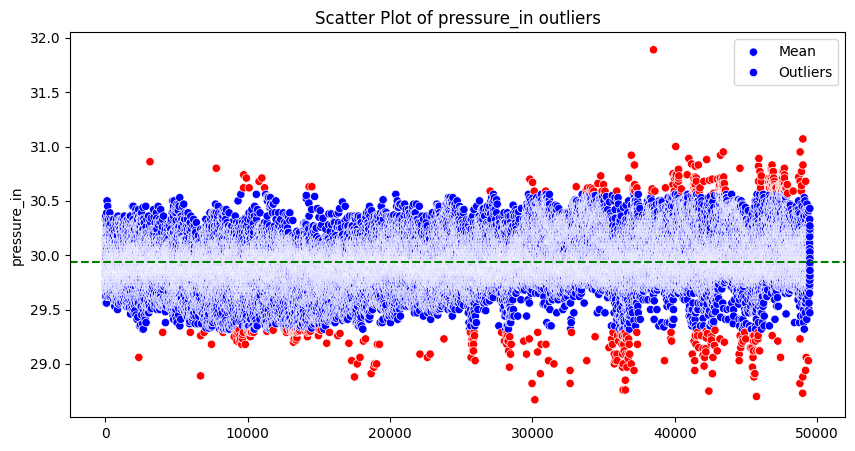

Total outliers found: 2361
     precip_in   Z_score
103       0.07  2.589848
135       0.07  2.589848
156       0.07  2.589848
165       0.04  1.384692
176       0.08  2.991566


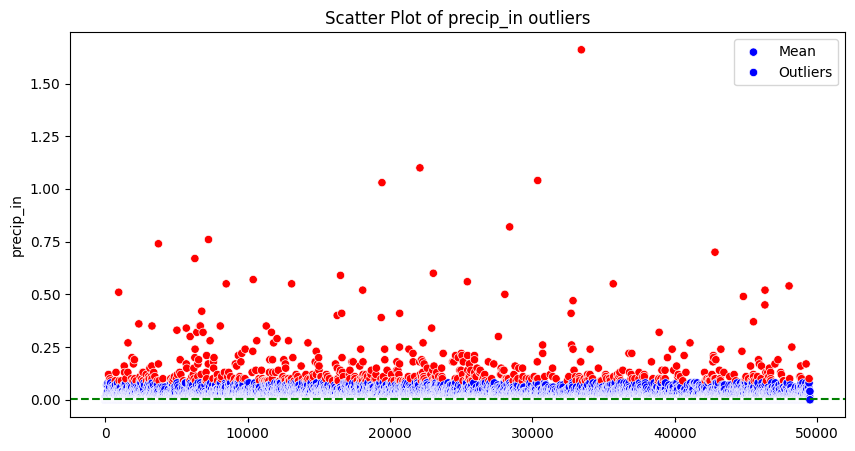

Total outliers found: 19160
   humidity   Z_score
0        24 -1.593780
1        94  1.244102
2        29 -1.391074
4        89  1.041397
6        93  1.203561


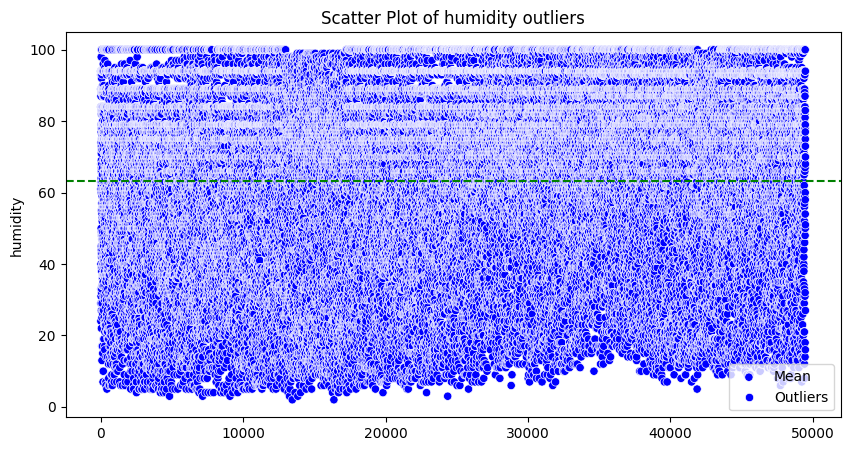

Total outliers found: 28454
   cloud   Z_score
1     75  1.034138
2      0 -1.187256
3    100  1.774603
6      0 -1.187256
8      0 -1.187256


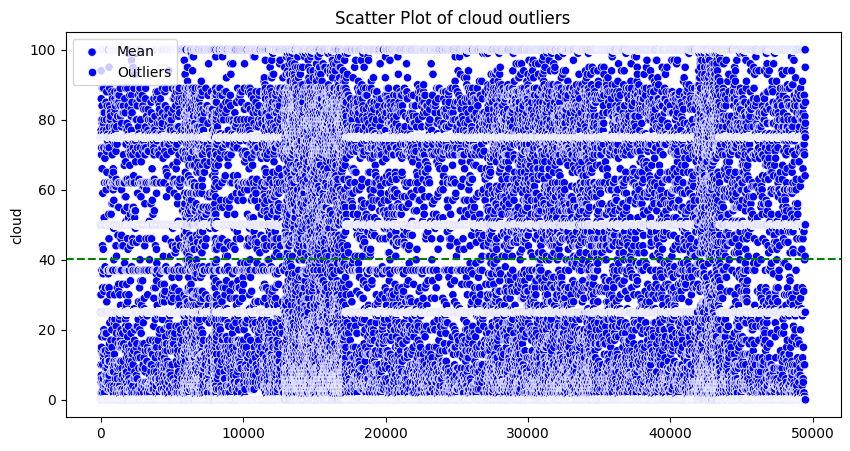

Total outliers found: 13642
    feels_like_fahrenheit   Z_score
3                    38.9 -1.845307
6                    44.9 -1.540623
8                    48.5 -1.357813
12                  113.6  1.948005
13                  106.4  1.582385


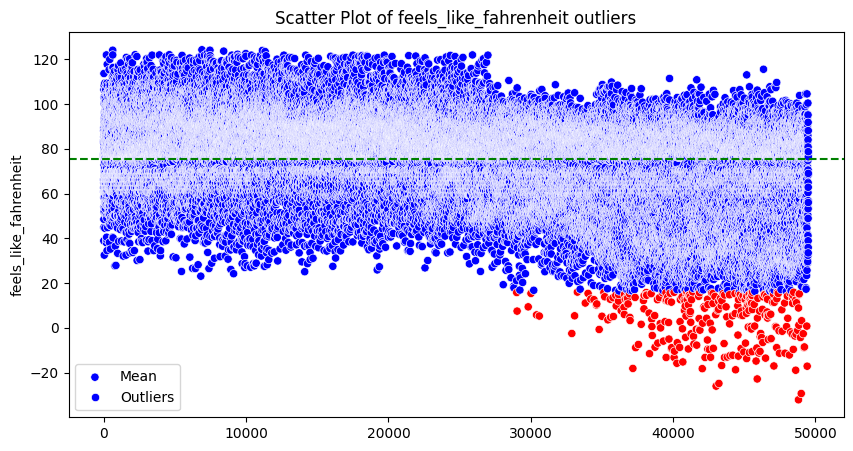

Total outliers found: 6933
    visibility_miles   Z_score
3                1.0 -3.014007
23               0.0 -3.655469
32              14.0  5.324999
35               4.0 -1.089621
40               4.0 -1.089621


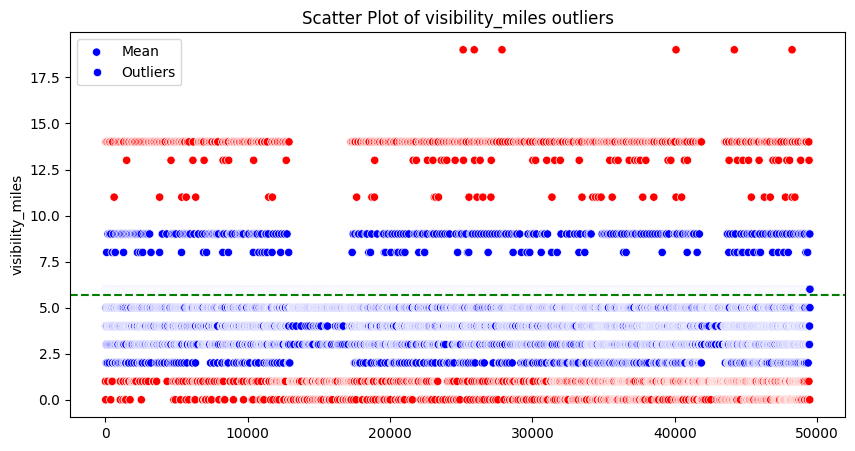

Total outliers found: 19371
    uv_index   Z_score
4        8.0  1.088750
12       8.0  1.088750
13       9.0  1.378192
24       8.0  1.088750
26       8.0  1.088750


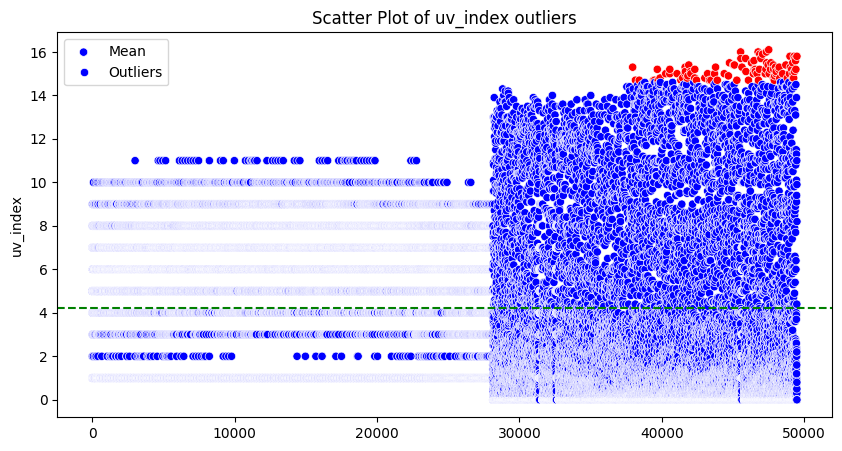

Total outliers found: 3869
    gust_mph   Z_score
11      24.2  1.122610
44      23.4  1.049145
46      28.7  1.535854
64      25.1  1.205259
75      23.0  1.012412


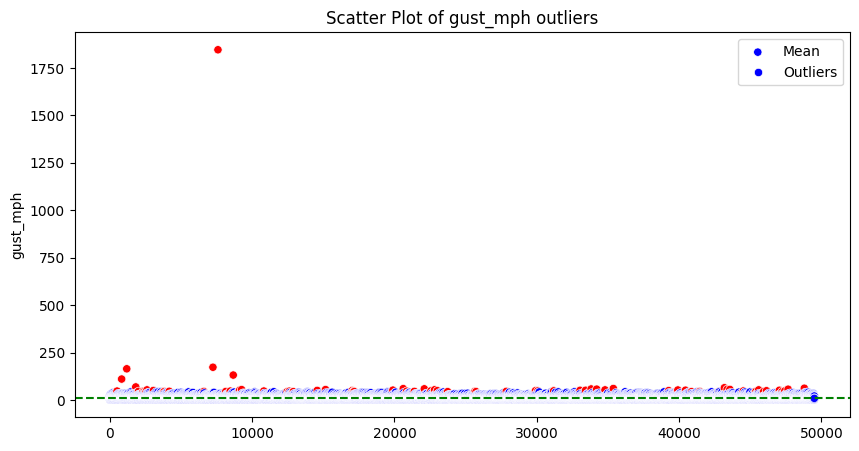

Total outliers found: 2240
    air_quality_Carbon_Monoxide   Z_score
4                        2964.0  2.467848
35                       2723.7  2.225392
50                       2403.3  1.902118
68                       2243.0  1.740380
78                       3471.4  2.979800


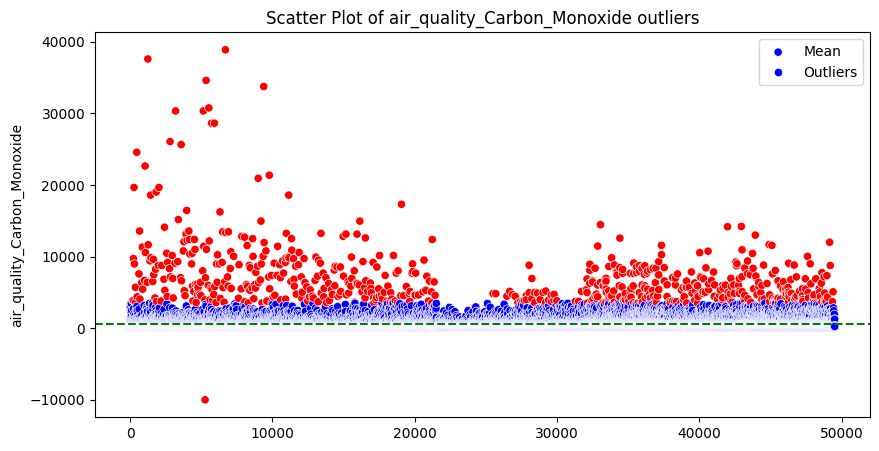

Total outliers found: 13851
   air_quality_Ozone   Z_score
0              103.0  1.066469
2               12.2 -1.342221
4               19.0 -1.161834
6                7.7 -1.461594
7              103.0  1.066469


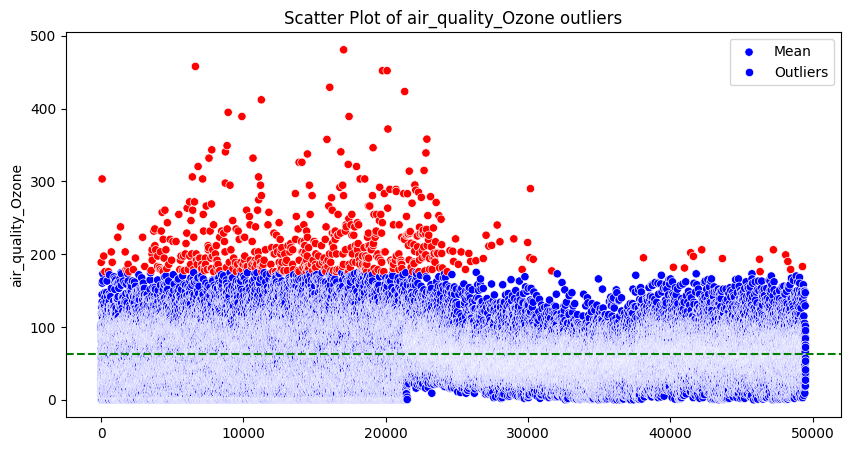

Total outliers found: 5671
    air_quality_Nitrogen_dioxide   Z_score
2                           65.1  1.969856
4                           72.7  2.263688
35                          41.8  1.069031
36                         101.5  3.377154
50                          72.7  2.263688


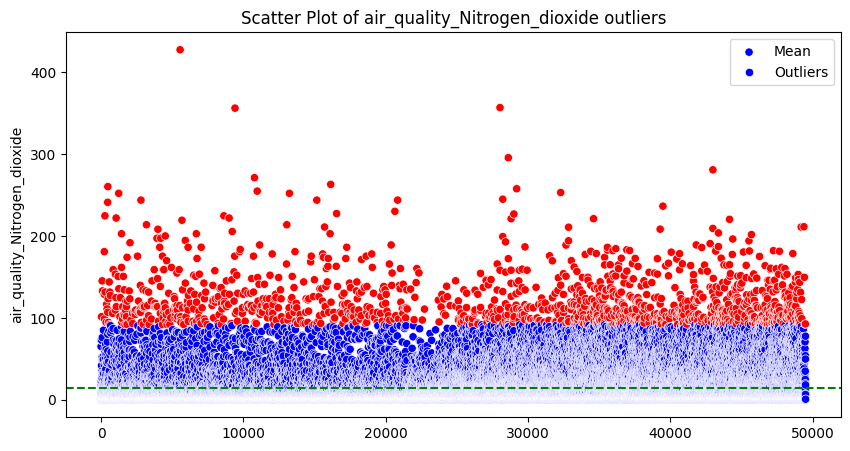

Total outliers found: 2096
     air_quality_Sulphur_dioxide   Z_score
36                         223.2  4.103415
79                         101.1  1.745445
151                         79.2  1.322517
161                         92.5  1.579364
173                         80.1  1.339898


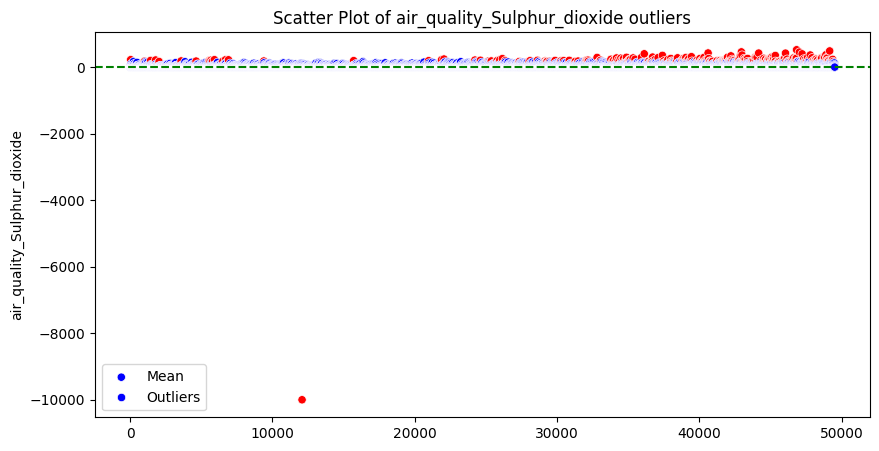

Total outliers found: 3077
    air_quality_PM2.5   Z_score
4               183.4  3.491412
35              211.1  4.097006
36               84.9  1.337946
68              132.0  2.367674
78              196.1  3.769067


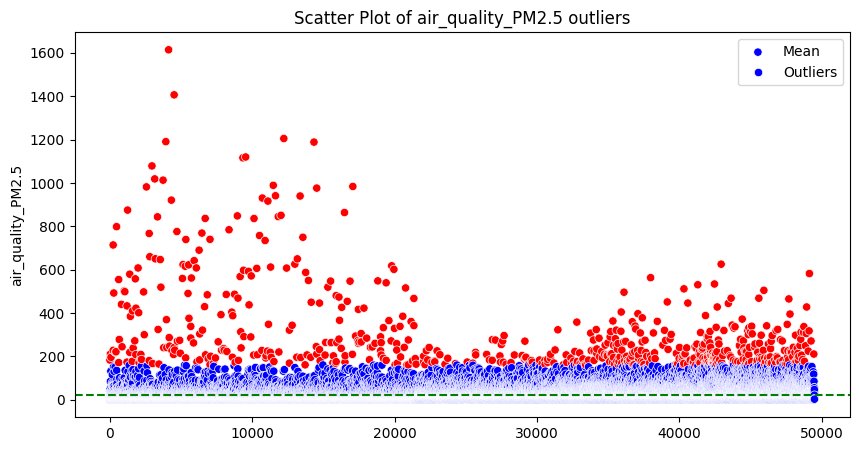

Total outliers found: 1869
     air_quality_PM10   Z_score
4               262.3  1.521331
35              268.6  1.565779
78              224.0  1.251118
163             223.3  1.246179
230             873.4  5.832745


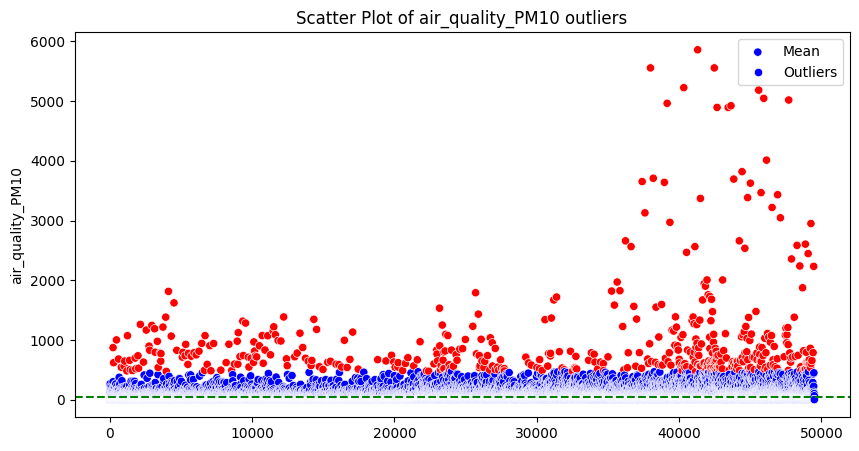

Total outliers found: 7389
    air_quality_us-epa-index   Z_score
4                          5  3.468750
13                         3  1.393834
35                         5  3.468750
36                         4  2.431292
61                         3  1.393834


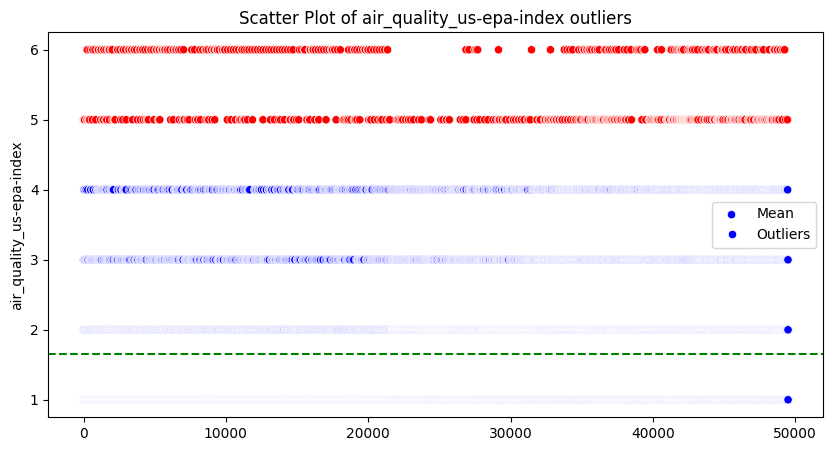

Total outliers found: 5785
    air_quality_gb-defra-index   Z_score
4                           10  3.010383
13                           6  1.398866
35                          10  3.010383
36                          10  3.010383
68                          10  3.010383


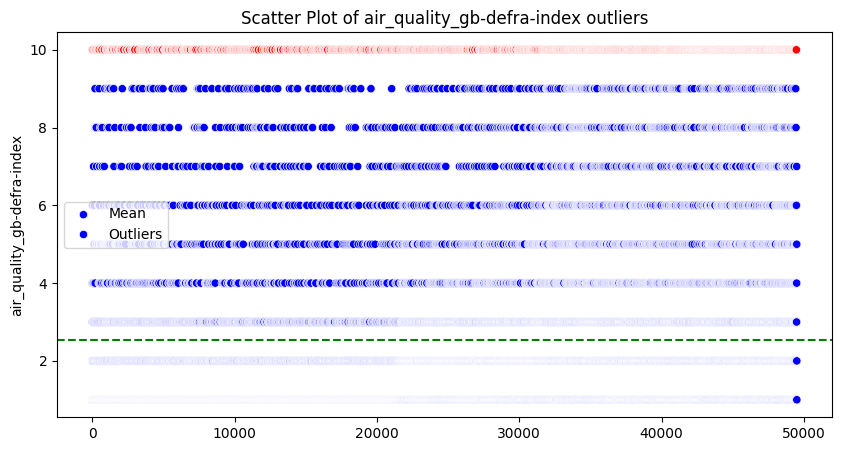

In [ ]:
for feature in features:
  df["Z_score"] = zscore(df[feature], nan_policy='omit')

  outliers = df[(df["Z_score"] > 1) | (df["Z_score"] < -1)]
  print(f"Total outliers found: {outliers.shape[0]}")
  print(outliers[[feature, "Z_score"]].head())

  plt.figure(figsize=(10, 5))
  sns.scatterplot(data=df, x=range(len(df)), y=feature, hue=df["Z_score"].abs() > 3, palette={True: "red", False: "blue"})
  plt.axhline(df[feature].mean(), color="green", linestyle="dashed", label="Mean")
  plt.title("Scatter Plot of " + feature+" outliers");
  plt.legend(["Mean", "Outliers"])
  plt.show()

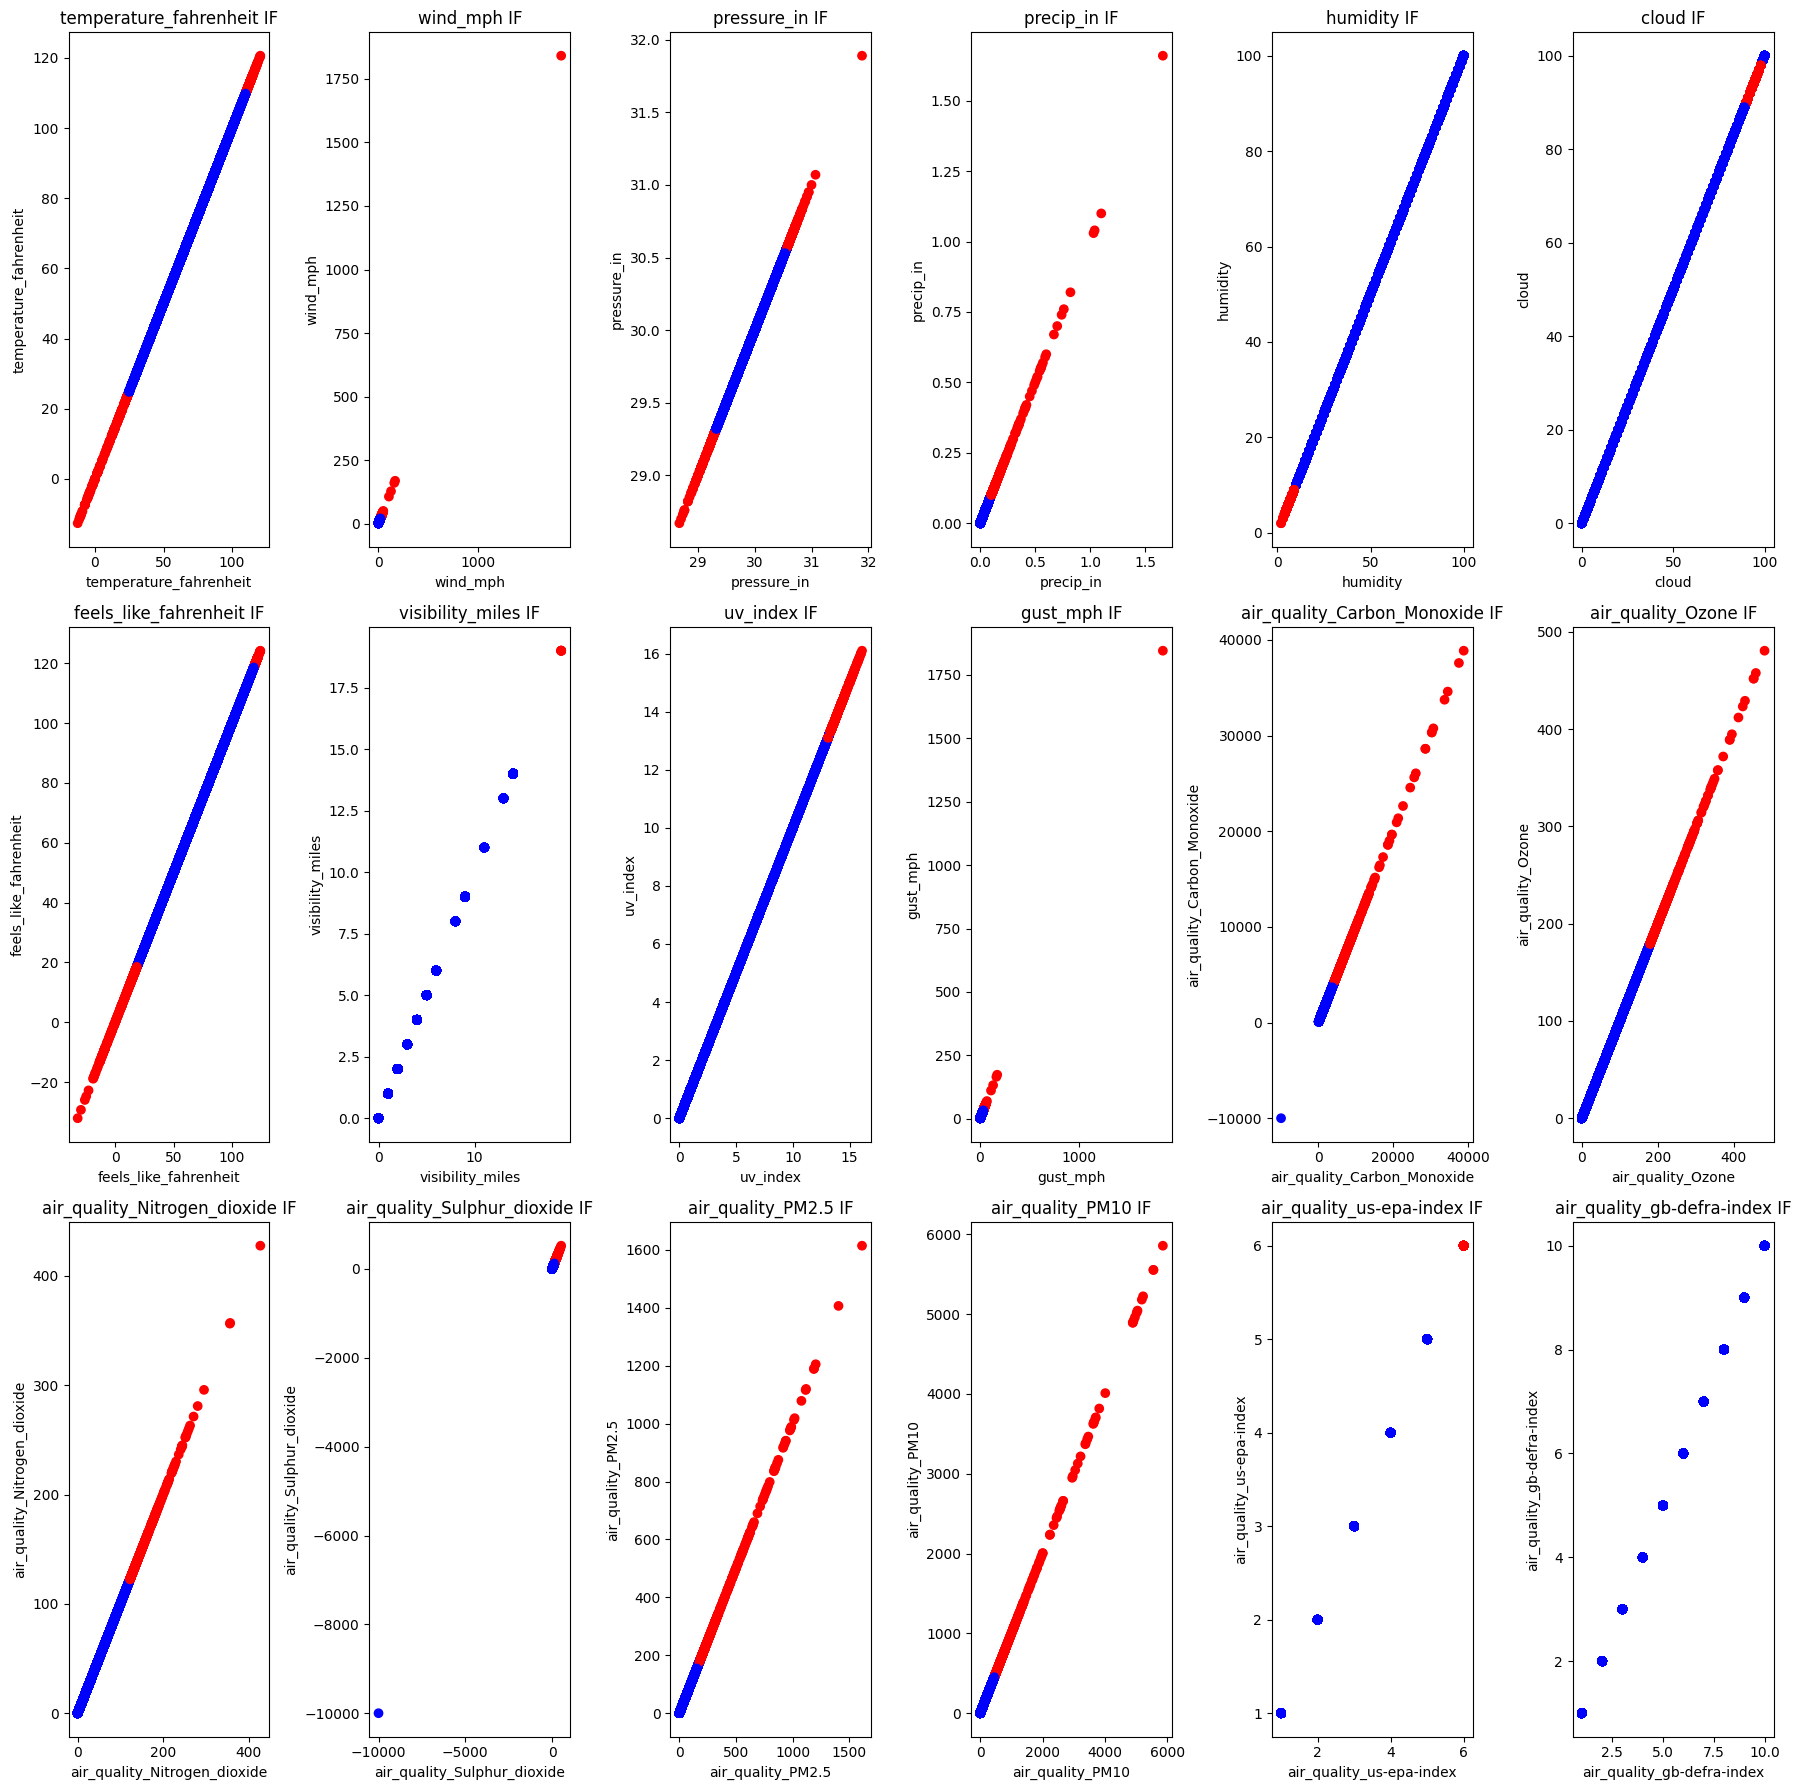

In [ ]:
data_new = pd.read_csv("GlobalWeatherRepository.csv")
data_new = data_new.reset_index(drop = False)
# Selecting numeric features
features = ['temperature_fahrenheit','wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']
# Create an empty list to store the Isolation Forest models
models = []
# Create and fit an Isolation Forest model for each feature
for feature in features:
    X = data_new[[feature]]
    model = IsolationForest(contamination=0.01)  # Adjust contamination as needed
    model.fit(X)
    models.append(model)
# Create scatter plots for each feature
fig, axes = plt.subplots(nrows=3, ncols = 6, figsize=(18, 18))
# Predict outliers for all features
outlier_labels = []
for i, feature in enumerate(features):
    row = i // 6
    col = i % 6
    X = data_new[[feature]]
    y_pred = models[i].predict(X)
    outlier_labels.append(y_pred)
    # Color-code data points based on outlier status
    colors = ['blue' if label == 1 else 'red' for label in y_pred]
    axes[row, col].scatter(X, X, c=colors)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f"{feature} IF")
plt.tight_layout()
plt.show()
# Create a boolean mask for inliers (True) and outliers (False)
inlier_mask = np.all(np.array(outlier_labels) == 1, axis=0)

<ipython-input-22-b9c4cb270bd8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country", data=data_new_top, order=top_10.index, palette="viridis")


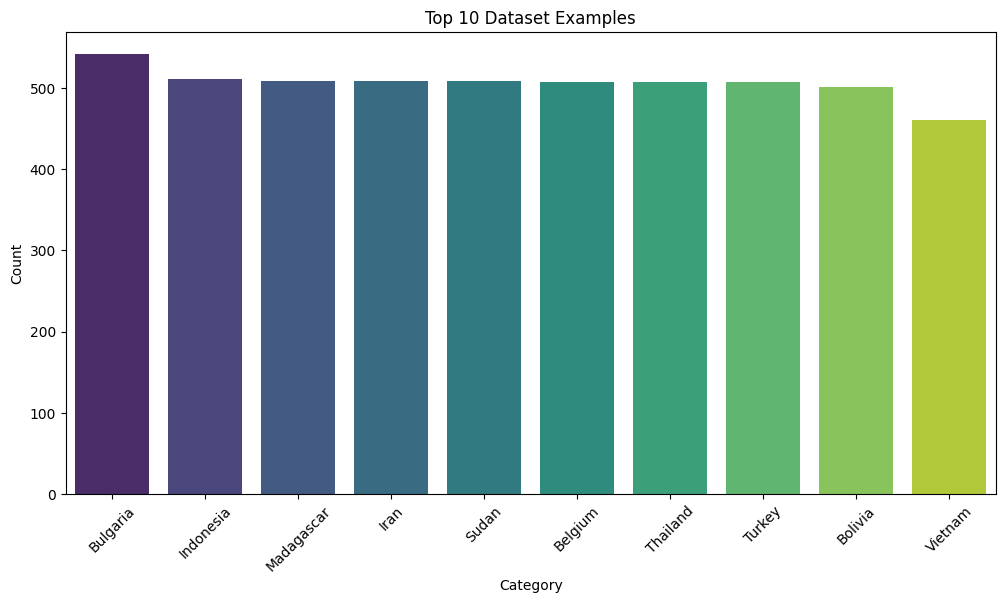

In [ ]:
# relation between features is what eda's are
top_10 = data_new["country"].value_counts().nlargest(10)
data_new_top = data_new[data_new["country"].isin(top_10.index)]
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=data_new_top, order=top_10.index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Dataset Examples")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load the data
# Assuming data_new is already loaded as a pandas DataFrame

# Display column names to check for 'condition' column
print(data_new.columns)
print(data_new["condition_text"])
label_encoder = LabelEncoder()
data_new['condition_encoded'] = label_encoder.fit_transform(data_new['condition_text']) #Encoding categorical values of "condition_text" to numerical representation using LabelEncoder, into 'condition_encoded' column
print(data_new['condition_encoded'])

Index(['index', 'country', 'location_name', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')
0             Partly Cloudy
1             Partly cloudy
2                     Sunny
3             Light drizzle
4             Partly cloudy
                ...        
49496 

In [ ]:
# Define features and target
features = ['temperature_fahrenheit', 'wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']

X = data_new[features]  # Using the previously defined numeric features
y = data_new['condition_encoded']

# Handle missing values if any
X = X.fillna(X.mean())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

In [ ]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)

In [ ]:

# Convert predictions back to categorical
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [ ]:
print("Actual Values for y_test")
print()
print(label_encoder.inverse_transform(y_test[:10])) #We are printing the first 10 values of the 'actual' values that we were supposed to get

Actual Values for y_test

['Overcast' 'Partly cloudy' 'Sunny' 'Partly cloudy' 'Patchy rain nearby'
 'Mist' 'Sunny' 'Light rain shower' 'Sunny' 'Heavy snow']


In [ ]:
print("Predicted Values for y_test")
print()
print(y_pred_labels[:10]) #We are printing the first 10 values that we have predicted.

Predicted Values for y_test

['Partly cloudy' 'Partly cloudy' 'Sunny' 'Partly cloudy' 'Partly cloudy'
 'Fog' 'Sunny' 'Partly cloudy' 'Sunny' 'Light drizzle']


We can compare both sets of outputs:
- Our Predicted Values
- The Actual values we are supposed to get

and then we can come to conclusion on how effective our model is

In [ ]:
#Evaluating Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.719018280981719


In [ ]:
#Our confusion matrix
print(confusion_matrix(y_test, y_pred))

[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0  254 ...  154    0    0]
 ...
 [   0    0   86 ... 2828    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the data again
import pandas as pd


# Display column names to check for 'condition' column
print(data_new.columns)

# Label Encoding for 'condition' (adjust column name if different)
if 'condition_text' in data_new.columns:
    label_encoder = LabelEncoder()
    data_new['condition_encoded'] = label_encoder.fit_transform(data_new['condition_text'])
else:
    raise KeyError("The 'condition' column is not found in the dataset. Please check the column name.")

# Define features and target
features = ['temperature_fahrenheit','wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']

X = data_new[features]  # Using the previously defined numeric features
y = data_new['condition_encoded']

# Handle missing values if any
X = X.fillna(X.mean())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso Regression Model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lasso.predict(X_test_scaled)

# Convert predictions back to categorical
# y_pred_rounded = np.round(y_pred).astype(int)
# y_pred_labels = label_encoder.inverse_transform(y_pred_rounded)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Display some sample predictions
sample_results = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test[:10]), 'Predicted': y_pred_labels[:10]})
print(sample_results)


Index(['index', 'country', 'location_name', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'condition_encoded'],
      dtype='object')
Mean Squared Error: 82.05509661636519
R-squared Score: 0.26673549332752866
               Actual      Predicted
0            Overcast  Partly clou